# EE 524 Machine Learning Lab: Assignment 4

- by Aikendrajit Roll no.: 206102002

Q.1. (a). Let us consider x to be a random variable, where x e [-10,10]. Generate 100 samples of x and plot the pdf of x for x~ N(0, 1) and x~N(3, 2). Comment on the difference in plot. If there is a difference in magnitude, comment why?

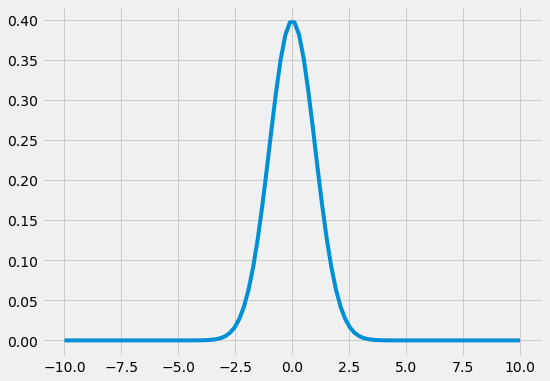

In [21]:
import numpy as np          #numpy is a library in python. It is imported and will be denoted as np in the program
from matplotlib import pyplot as plt   #from matplot library, pyplot is imported and will be used as acronym plt

x = np.linspace(-10, 10, 100)   #np.linespace means ... x ranges between -10 and 10 & value of N is 100.
mu = 0                          #here mu represents mean, mean = 0 (given)
sigma = 1                       #here sigma is the standard deviation, sigma**2 is the variance which is zero (given) 

y = (1 / (np.sqrt(2 * np.pi * np.power(sigma, 2)))) * (np.power(np.e, -(np.power((x - mu), 2) / (2 * np.power(sigma, 2)))))

plt.style.use('fivethirtyeight')           #style used in this plot. There are 26 styles available in matplot library for jupyter notebook
plt.rcParams['figure.figsize'] = (8,6)     #here figure size is defined as 8,6
plt.plot(x,y)                              #plot function
plt.show()                                 #it will display the plot

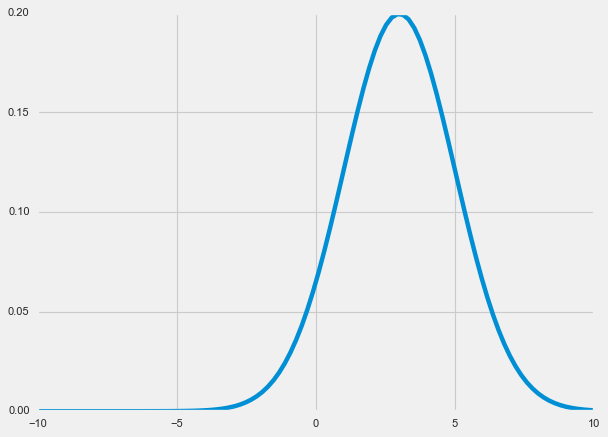

In [31]:
import numpy as np          #numpy is a library in python. It is imported and will be denoted as np in the program
from matplotlib import pyplot as plt   #from matplot library, pyplot is imported and will be used as acronym plt

x = np.linspace(-10, 10, 100)        #np.linespace means ... x ranges between -10 and 10 & value of N is 100.
mu = 3                                #here mu represents mean, mean = 3 (given)
sigma = 2                             #here sigma is the standard deviation, sigma**2 is the variance which is 4 (given) 

y = (1 / (np.sqrt(2 * np.pi * np.power(sigma, 2)))) * (np.power(np.e, -(np.power((x - mu), 2) / (2 * np.power(sigma, 2)))))

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8,6)
plt.plot(x,y)
plt.show()

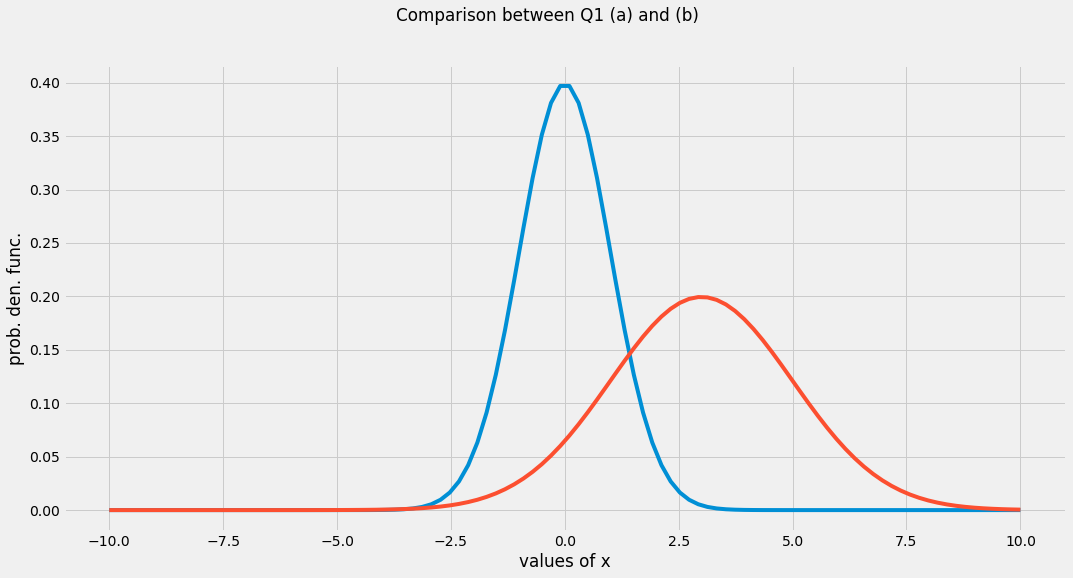

In [37]:
#-----------------------Comparison between Q1 (a) & (b)----------------------

import numpy as np          #numpy is a library in python. It is imported and will be denoted as np in the program
from matplotlib import pyplot as plt   #from matplot library, pyplot is imported and will be used as acronym plt

x = np.linspace(-10, 10, 100)   #np.linespace means ... x ranges between -10 and 10 & value of N is 100.
mu_1 = 0                          #here mu represents mean, mean = 0 (given)
sigma_1 = 1                       #here sigma is the standard deviation, sigma**2 is the variance which is 1 (given) 
y_1 = (1 / (np.sqrt(2 * np.pi * np.power(sigma_1, 2)))) * (np.power(np.e, -(np.power((x - mu_1), 2) / (2 * np.power(sigma_1, 2)))))

mu_2 = 3                          #here mu represents mean, mean = 3 (given)
sigma_2 = 2                       #here sigma is the standard deviation, sigma**2 is the variance which is 4 (given) 
y_2 = (1 / (np.sqrt(2 * np.pi * np.power(sigma_2, 2)))) * (np.power(np.e, -(np.power((x - mu_2), 2) / (2 * np.power(sigma_2, 2)))))


plt.style.use('fivethirtyeight')           #style used in this plot. There are 26 styles available in matplot library for jupyter notebook
plt.rcParams['figure.figsize'] = (16,8)     #here figure size is defined as 16,8
plt.plot(x,y_1)                         #plot function
plt.plot(x,y_2)
plt.xlabel('values of x')
plt.ylabel('prob. den. func.')
plt.suptitle('Comparison between Q1 (a) and (b)')
plt.show()  

Comment on the difference in plot. If there is a difference in magnitude, comment why?

Ans: Yes,

 Comparing Q1 (a) and (b), we have observed that, as the value of sigma i.e. variance increases, implies standard deviation increases. And hence the bell shaped curve gets widespread along the x-axis. 
 
 We have observed that the blue curve has higher pdf as compared wrt the red curve that has less sigma value. So, we can say that higher the standard deviation, lower the pdf. Or we can say that the standard deviation of a function is inversely proportional with the pdf.
 

Q1. (b). Consider the two-dimensional normal distribution p(x|w) ~ N(mu,sigma) where mu=[[0],[0]] and sigma=[[1, 0.6],[0.6,2]]. 
Let x be a random vector defined by x = [[x1],[x2]], where xi e [-10, 10]. 
Plot the surface plot and contour plot of the pdf.

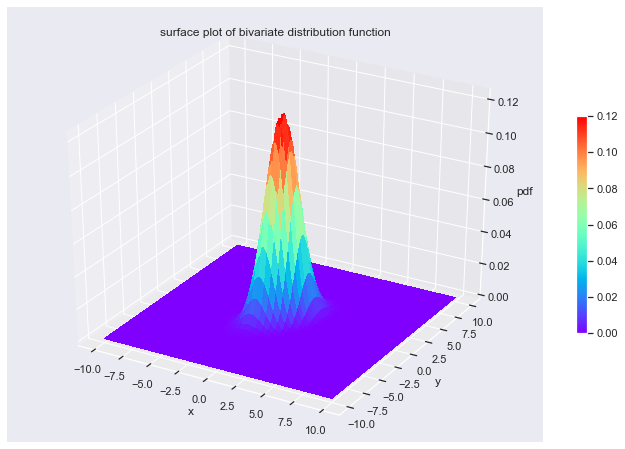

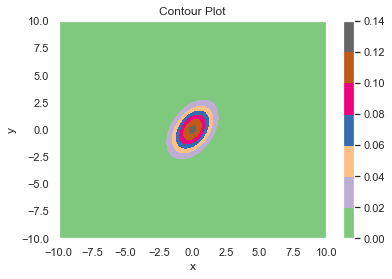

In [404]:
import numpy as np
import scipy.linalg as spla
from matplotlib import cm
from matplotlib import pyplot as plt

#for multivariate normal distribution function
def multivariate_normal_dist(x, d, mean, covariance):
    x_m = x - mean
    return (1 / (np.sqrt((2 * np.pi)**d * spla.det(covariance))) * np.exp(-(spla.solve(covariance, x_m).T.dot(x_m)) / 2))


def generate_density_surface(mean, covariance, d):
    x1s = np.linspace(-10, 10, 100) # grid size is 100
    x2s = np.linspace(-10, 10, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    pdf = np.zeros((100, 100))
    for i in range(100):
        for j in range(100):
            pdf[i,j] = multivariate_normal_dist(np.matrix([[x1[i,j]], [x2[i,j]]]), d, mean, covariance)
    return x1, x2, pdf  


d = 2        #size / no. of dimensions
#since the system is bivariate
bivariate_mean = np.matrix([[0.], [0.]])
bivariate_covariance = np.matrix([[1., 0.6], [0.6, 2]])

fig = plt.figure(figsize=(12,8))          
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x1, x2, pdf, cmap=plt.cm.rainbow, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5)
ax.set_title('surface plot of bivariate distribution function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('pdf')
plt.show()

# Countour plot of the bivariate distribution function
        
fig,ax=plt.subplots(1,1)
contour_plot = ax.contourf(x1, x2, pdf, cmap=plt.cm.Accent)
fig.colorbar(contour_plot) 
ax.set_title('Contour Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

Q2. Classify the iris flower dataset using a Naive Bayes Classifier. Link to download the dataset is here. 
The dataset consists of 3 classes and has 150 data samples. Each data sample has 4 features and a class label. 
The details related to the dataset can be found here. Consider 70% of the data as training samples and the rest as 
testing samples. Display the predicted labels and the true labels. Also, calculate the accuracy of
your prediction. 

Note: 
1. Arrange the samples according to class and calculate the prior probability of each class using a Gaussian distribution. 
2. Don't arbitrarily choose 70% data for training. First arrange according to each class and then randomly choose the training and the testing samples from each class.
3. This is a supervised method. The testing labels should be used only to compare with the predicted labels. 
Also, you can opt for the confusion matrix(optional) to present your prediction. In case you are not using confusion
matrix, show the predicted labels and true labels of each data sample using a bar diagram.

In [364]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [365]:
dataset.keys() 

#here we can see 4 features of the species "iris flower"

Index(['SepalLength(Cm)', 'SepalWidth(Cm)', 'PetalLength(Cm)',
       'PetalWidth(Cm)', 'Species'],
      dtype='object')

In [366]:
dataset = pd.read_csv('iris.data')  

#we have edited the data file and added the names of the features on the data file of iris flower dataset. 
#now this edited data file is read 

In [367]:
dataset.head() #by default this will display first 5 rows of the iris dataset

,SepalLength(Cm),SepalWidth(Cm),PetalLength(Cm),PetalWidth(Cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [368]:
dataset.shape  #size of the dataset

(150, 5)

In [369]:
dataset.describe()       

#its a function of dataframe in python. It generates descriptive statistics of the dataset
#count, mean, standard deviation, minimum value among all, 25th, 50th, 75th percentiles and max of all. are provided

,SepalLength(Cm),SepalWidth(Cm),PetalLength(Cm),PetalWidth(Cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


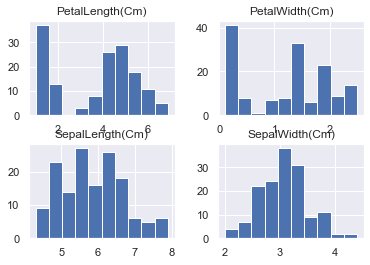

In [370]:
sns.set()
dataset.hist()
plt.show()

In [371]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validate_size = 0.3     #30
X_train, X_validate, Y_train, Y_validate = sklearn.model_selection.train_test_split(X, Y, test_size=validate_size, 
                                                                                    random_state=1)

In [372]:
#for test model
num_folds = 10  
num_instances = len(X_train)
scoring = 'accuracy'

In [373]:
nv = GaussianNB()
nv.fit(X_train, Y_train)
predictions = nv.predict(X_validate)
print(accuracy_score(Y_validate, predictions))
print(confusion_matrix(Y_validate, predictions))
print(classification_report(Y_validate, predictions))

0.9333333333333333
[[14  0  0]
 [ 0 16  2]
 [ 0  1 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.89      0.91        18
 Iris-virginica       0.86      0.92      0.89        13

       accuracy                           0.93        45
      macro avg       0.93      0.94      0.93        45
   weighted avg       0.94      0.93      0.93        45

